# Phân tích commits của repository

## Đọc và tiền xử lý dữ liệu

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

df = pd.read_csv('commits_data.csv')
df.head()

,Commit ID,Date,Author,Commit Message,File Changed
0,5a545dde7dccee9c3067585ecd237e742deed698,2024-06-12 18:49:14,Lawrence Mitchell,Pre-clean docstrings when running EmbedSignatu...,"['Cython/Compiler/AutoDocTransforms.py', 'test..."
1,50fb5cf1c220c0ecf9440d56612ffc8948e8e22e,2024-06-09 08:53:09,da-woods,Remove some more unused Py2 code (GH-6233),"['Cython/Compiler/ModuleNode.py', 'Cython/Util..."
2,bcef509b6af6eea6c21f84abfbcdc1e61f455e4b,2024-06-07 18:35:47,Lysandros Nikolaou,Set up uploading non-compiled nightly wheels t...,['.github/workflows/nightly-wheels.yml']
3,52528da1a7899a459252041a694bcf0a78f7f5cd,2024-06-06 19:42:17,Michael Man,Fix segfault on zero-length slice assignment o...,"['Cython/Utility/MemoryView.pyx', 'tests/memor..."
4,965d7aa3485b8ba0497803c5b54cacf3f4acdbb0,2024-06-04 06:19:01,da-woods,Get basic generators running in Limited API (#...,"['Cython/Utility/Coroutine.c', 'Cython/Utility..."


In [65]:
df.shape

(3249, 5)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Commit ID       3248 non-null   object
 1   Date            3249 non-null   object
 2   Author          3249 non-null   object
 3   Commit Message  3249 non-null   object
 4   File Changed    3249 non-null   object
dtypes: object(5)
memory usage: 127.0+ KB


In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Commit ID,Date,Author,Commit Message,File Changed,Year,Month
0,5a545dde7dccee9c3067585ecd237e742deed698,2024-06-12 18:49:14,Lawrence Mitchell,Pre-clean docstrings when running EmbedSignatu...,"['Cython/Compiler/AutoDocTransforms.py', 'test...",2024,6
1,50fb5cf1c220c0ecf9440d56612ffc8948e8e22e,2024-06-09 08:53:09,da-woods,Remove some more unused Py2 code (GH-6233),"['Cython/Compiler/ModuleNode.py', 'Cython/Util...",2024,6
2,bcef509b6af6eea6c21f84abfbcdc1e61f455e4b,2024-06-07 18:35:47,Lysandros Nikolaou,Set up uploading non-compiled nightly wheels t...,['.github/workflows/nightly-wheels.yml'],2024,6
3,52528da1a7899a459252041a694bcf0a78f7f5cd,2024-06-06 19:42:17,Michael Man,Fix segfault on zero-length slice assignment o...,"['Cython/Utility/MemoryView.pyx', 'tests/memor...",2024,6
4,965d7aa3485b8ba0497803c5b54cacf3f4acdbb0,2024-06-04 06:19:01,da-woods,Get basic generators running in Limited API (#...,"['Cython/Utility/Coroutine.c', 'Cython/Utility...",2024,6


In [68]:
# Get data from 2020 to now
df = df[df['Year']>=2020]
df.tail()

,Commit ID,Date,Author,Commit Message,File Changed,Year,Month
3210,9a53c8ac9a9438822dd1659fee4ae478953ce38a,2020-01-08 10:54:52,Stefan Behnel,Merge branch '0.29.x',['tests/run/generators.pyx'],2020,1
3211,c4a5b6ace3b50f14abd067127fe76d65ba961091,2020-01-08 10:53:02,Stefan Behnel,Test cleanups.,['tests/run/generators.pyx'],2020,1
3212,83e4a348992a1a90231639a4d31d0e827cb13732,2020-01-08 10:44:20,da-woods,Fixed handling of kwds in generator closures (...,"['Cython/Compiler/Nodes.py', 'tests/run/genera...",2020,1
3213,c2d76d3201603385d4d9d4780e1f0257056e8363,2020-01-08 10:44:20,da-woods,Fixed handling of kwds in generator closures (...,"['Cython/Compiler/Nodes.py', 'tests/run/genera...",2020,1
3214,dd64445f7b74338e911ead8c566e939a2d62cf52,2020-01-08 10:41:02,da-woods,Remove unnecessary sentence from documentation...,['docs/src/quickstart/install.rst'],2020,1


In [69]:
df.isnull().sum()

Commit ID         0
Date              0
Author            0
Commit Message    0
File Changed      0
Year              0
Month             0
dtype: int64

In [70]:
df.duplicated().sum()

0

## Tổng số lượng commits phân bố theo các tháng như thế nào?

Text(0, 0.5, 'số lượng commits')

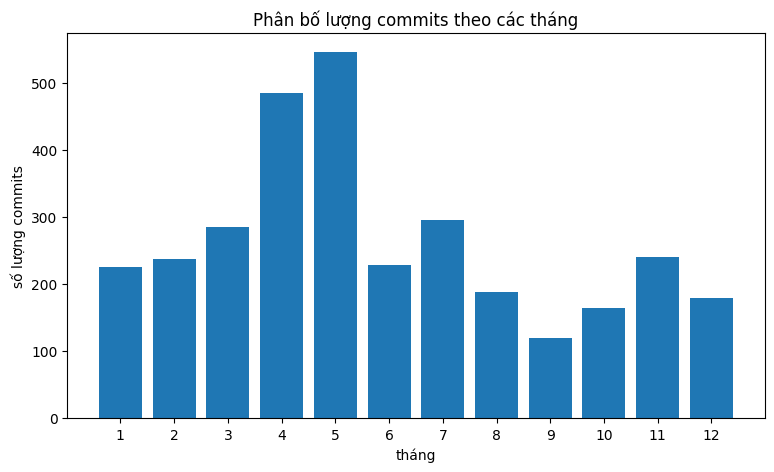

In [71]:
top_commit_month = df.groupby('Month').count()['Commit ID'].reset_index()
top_commit_month.columns = ['Month', 'Number of commits']
plt.figure(figsize=(9, 5))
plt.bar(top_commit_month['Month'],top_commit_month['Number of commits'])
plt.xticks(top_commit_month['Month']) 
plt.title('Phân bố lượng commits theo các tháng')
plt.xlabel('tháng')
plt.ylabel('số lượng commits')

In [72]:
commit_12month = df[['Year', 'Month', 'Commit ID']]
commit_12month = commit_12month.groupby(['Year','Month']).count().reset_index()
commit_12month.columns = ['Year', 'Month', 'Commits']
commit_12month.head()

,Year,Month,Commits
0,2020,1,41
1,2020,2,46
2,2020,3,81
3,2020,4,232
4,2020,5,245


Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng commit trong từng tháng của các năm')

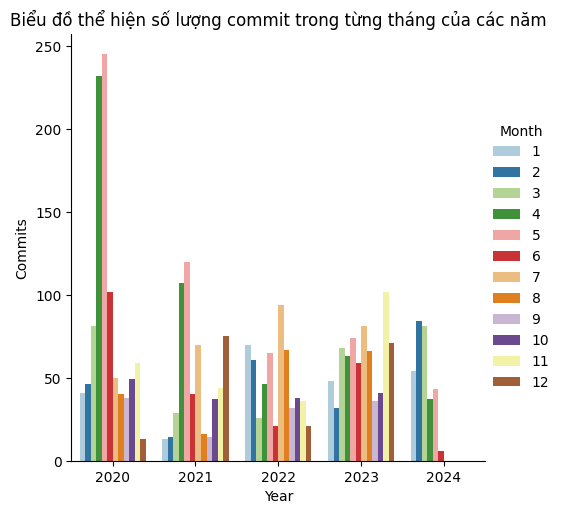

In [73]:
sns.catplot(data=commit_12month, x ='Year', y ='Commits', hue ='Month', kind ='bar', legend ='full', palette="Paired")
plt.title('Biểu đồ thể hiện số lượng commit trong từng tháng của các năm')

## Những contributors nào đã có đóng góp trong 5 năm liên tiếp?

In [74]:
# Number of contributors
len(df.groupby('Author').count())

199

In [75]:
# Group the number of commits by Year and Author
author_of_year = df.groupby(['Year','Author']).count()['Commit ID']
author_of_year

Year  Author         
2020  Alex Henrie         2
      Alexey Stepanov     1
      Ashwin Srinath      5
      Ben McGinnes        2
      Celelibi            4
                         ..
2024  da-woods           93
      eewanco             2
      gentlegiantJGC      1
      samaingw            1
      scoder              9
Name: Commit ID, Length: 262, dtype: int64

In [76]:
# List author of years
list20 = author_of_year[2020].index
list21 = author_of_year[2021].index
list22 = author_of_year[2022].index
list23 = author_of_year[2023].index
list24 = author_of_year[2024].index
list24

Index(['Alexander Condello', 'Alexandra Pereira', 'Bluenix', 'Clément Robert',
       'Denis Lukianov', 'Gonzalo Tornaría', 'Inada Naoki', 'Jason Fried',
       'Jelle van der Waa', 'Kent Slaney', 'Kieran', 'Lawrence Mitchell',
       'Lisandro Dalcin', 'Lysandros Nikolaou', 'Matti Picus', 'Matus Valo',
       'Michael Man', 'Nathan Goldbaum', 'Patrick Kunzmann', 'Raffi Enficiaud',
       'Somin An', 'Stefan Behnel', 'Stefano Rivera', 'Tong He',
       'Victor Stinner', 'Vyas Ramasubramani', 'Xenia Lu', 'YoSTEALTH',
       'da-woods', 'eewanco', 'gentlegiantJGC', 'samaingw', 'scoder'],
      dtype='object', name='Author')

In [77]:
# Find authors who have contributed for 5 consecutive years
res1 = np.intersect1d(list20, list21)
res2 = np.intersect1d(res1, list22)
res3 = np.intersect1d(res2, list23)
author_of5y = np.intersect1d(res3, list24)
author_of5y

array(['Matti Picus', 'Stefan Behnel', 'da-woods', 'scoder'], dtype=object)

In [78]:
# Top 10 authors with the most commits
top10_author = df['Author'].value_counts()[:10]
top10_author

Author
Stefan Behnel      1854
da-woods            588
Matus Valo           97
scoder               80
Matti Picus          60
Max Bachmann         37
0dminnimda           29
Robert Bradshaw      28
Zackery Spytz        23
Lisandro Dalcin      15
Name: count, dtype: int64

Text(0, 0.5, 'contributor')

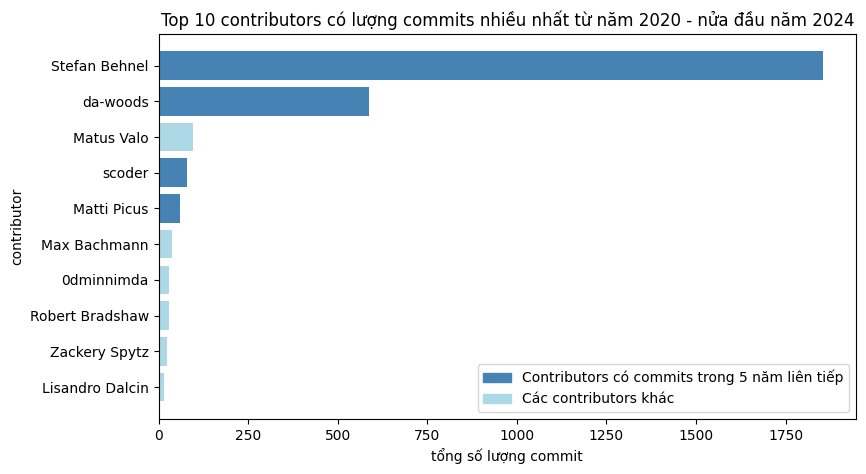

In [79]:
bar_colors = ['lightblue']*10
i = 0
for author in top10_author.index[::-1]:
    if author in author_of5y:
        bar_colors[i] = 'steelblue'
    i += 1;
    
plt.figure(figsize=(9, 5))
plt.barh(top10_author.index[::-1], top10_author[::-1], color= bar_colors, height = 0.8)
colors = {'Contributors có commits trong 5 năm liên tiếp':'steelblue', 'Các contributors khác':'lightblue'}   
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('Top 10 contributors có lượng commits nhiều nhất từ năm 2020 - nửa đầu năm 2024')
plt.xlabel('tổng số lượng commit')
plt.ylabel('contributor')

### Liệu có phải Matus Valo đã ngừng đóng góp cho repo này hay không?

In [80]:
df[df['Author'] == 'Matus Valo'].groupby('Year').count()

,Commit ID,Date,Author,Commit Message,File Changed,Month
Year,,,,,,
2021,16,16,16,16,16,16
2022,29,29,29,29,29,29
2023,32,32,32,32,32,32
2024,20,20,20,20,20,20


## Có bao nhiêu commits được thực hiện bởi ít nhất 2 contributors, tăng hay giảm theo từng năm?

In [81]:
# All the commits 
number_of_commits = df['Commit ID'].count()
number_of_commits

3198

In [82]:
# Commits made by co-author
co_authors = df[df['Commit Message'].str.contains('Co-authored-by')]
co_authors['Commit ID'].count()

38

In [83]:
# Commits made by co-author grouped by year
co_authors = co_authors.groupby('Year').count()['Commit ID'].reset_index()
co_authors.columns = ['Year', 'Number of commits']
co_authors

,Year,Number of commits
0,2020,2
1,2021,2
2,2022,4
3,2023,18
4,2024,12


# Phân tích issues của repository

## Đọc và tiền xử lý dữ liệu

In [84]:
issue_df = pd.read_csv('issues_data.csv')
issue_df.head()

,Issue Number,Title,State,Comments,Created At,Closed At
0,6246,Copy py_limited_api attribute of setuptools ex...,open,0,2024-06-13,NaN
1,6245,[BUG] Issue after upgrading to Cython 3.0.10,open,2,2024-06-13,NaN
2,6244,[BUG] Use of `Py_LIMITED_API` sometimes result...,closed,3,2024-06-12,2024-06-12
3,6243,Add option to silence IF deprecation warning,open,1,2024-06-12,NaN
4,6242,Add freethreading_compatible directive to set ...,open,1,2024-06-12,NaN


In [85]:
issue_df.isnull().sum()

Issue Number       0
Title              0
State              0
Comments           0
Created At         0
Closed At       1325
dtype: int64

In [86]:
issue_df.duplicated().sum()

0

In [87]:
# Time to close an issue
issue_df['Created At'] = pd.to_datetime(issue_df['Created At'])
issue_df['Closed At'] = pd.to_datetime(issue_df['Closed At'])
issue_df['Time to closed'] = issue_df['Closed At'] - issue_df['Created At']
issue_df['Created Year'] = issue_df['Created At'].dt.year
issue_df.tail()


,Issue Number,Title,State,Comments,Created At,Closed At,Time to closed,Created Year
6219,562,no mangling of double underscore names in class,closed,10,2008-05-06,2011-09-10,1222 days,2008
6220,561,from package cimport module doesn't work,closed,6,2008-05-06,2009-04-02,331 days,2008
6221,560,Cython calls ExtType.__init__() as Python func...,open,6,2008-05-06,NaT,NaT,2008
6222,559,Cython needs better support for API documentation,closed,10,2008-05-06,2008-09-24,141 days,2008
6223,558,Several inplace operators not defined,closed,2,2008-05-05,2008-06-07,33 days,2008


## Tỉ lệ issue đang đóng và mở của repository

In [88]:
issue_df.shape

(6224, 8)

In [89]:
numOfClosed = issue_df[issue_df['State'] == 'closed'].count()['Title']
percentOfClosed = round(numOfClosed/(issue_df.shape[0])*100, 2)
percentOfOpen = round(100 - percentOfClosed, 2)
[percentOfClosed, percentOfOpen]

[78.71, 21.29]

Text(0.5, 1.0, 'Tỉ lệ issue đã đóng và đang mở của repo từ trước đến nay')

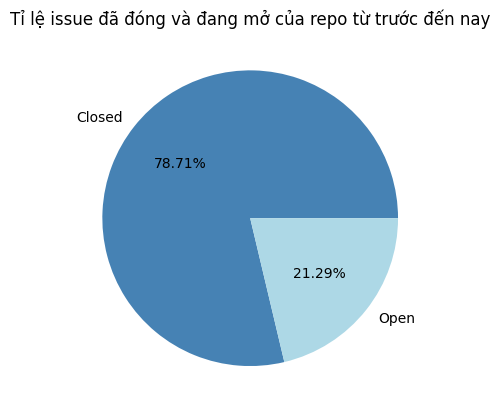

In [90]:
plt.pie([percentOfClosed, percentOfOpen], labels = ['Closed' , 'Open'], colors= ['steelblue', 'lightblue'], autopct='%1.2f%%')
plt.title('Tỉ lệ issue đã đóng và đang mở của repo từ trước đến nay')

## Mối liên hệ giữa năm issue được tạo ra và khoảng thời gian để 1 issue được giải quyết

In [91]:
closed_df = issue_df[issue_df['State'] == 'closed']
closed_df.sort_values('Time to closed')

,Issue Number,Title,State,Comments,Created At,Closed At,Time to closed,Created Year
2,6244,[BUG] Use of `Py_LIMITED_API` sometimes result...,closed,3,2024-06-12,2024-06-12,0 days,2024
4968,404,Change temp type used for buffer indexing to s...,closed,7,2015-06-28,2015-06-28,0 days,2015
4972,401,make __name__ of Compiler.Scanning.Method acce...,closed,1,2015-06-23,2015-06-23,0 days,2015
2133,4102,Fix optimised_pow2_inplace() on Python 3.10,closed,2,2021-04-07,2021-04-07,0 days,2021
2131,4104,Only #define PY_SSIZE_T_CLEAN if it is not alr...,closed,0,2021-04-08,2021-04-08,0 days,2021
...,...,...,...,...,...,...,...,...
6090,694,cpdef method w/ unused buffer causes compilati...,closed,2,2008-11-25,2021-04-18,4527 days,2008
5903,881,Test suite for pyximport,closed,1,2009-05-26,2022-02-02,4635 days,2009
6181,600,Mysterious error with conflicting types,closed,5,2008-08-10,2022-02-25,4947 days,2008
6197,584,inspection of compilation namespace for IF/ELI...,closed,2,2008-07-19,2022-03-25,4997 days,2008


Text(0, 0.5, 'số ngày để giải quyết')

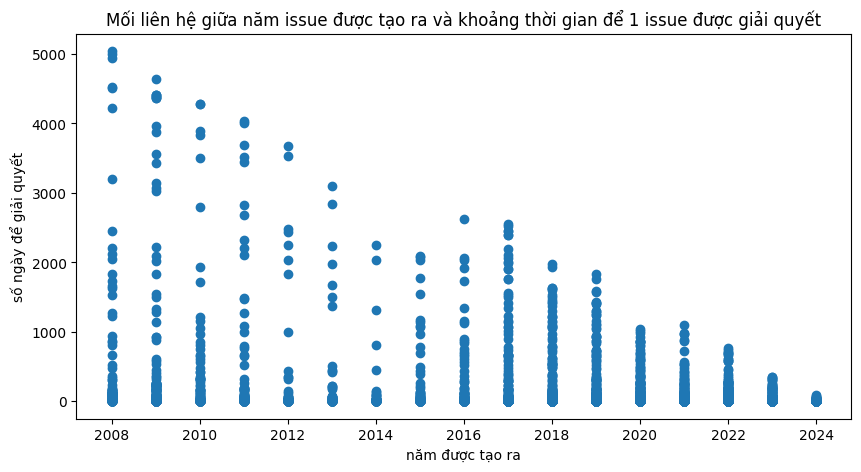

In [92]:
plt.figure(figsize=(10, 5))
plt.scatter(closed_df['Created Year'], closed_df['Time to closed'].dt.days)
plt.title('Mối liên hệ giữa năm issue được tạo ra và khoảng thời gian để 1 issue được giải quyết')
plt.xlabel('năm được tạo ra')
plt.ylabel('số ngày để giải quyết')

## Liên hệ giữa commit và issue

In [93]:
issue_df['Created Month'] = issue_df['Created At'].dt.month
# Issues opend from 2020 to now
issue20_df =  issue_df[issue_df['Created Year'] >= 2020]
issue20_df = issue20_df.groupby(['Created Year']).count()['Issue Number'].reset_index()
issue20_df.columns = ['Year', 'Number of issues']
issue20_df.head()

,Year,Number of issues
0,2020,664
1,2021,589
2,2022,633
3,2023,739
4,2024,314


In [94]:
commit_df = df.groupby(['Year']).count()['Commit ID'].reset_index()
commit_df.columns = ['Year', 'Number of commits']
commit_df

,Year,Number of commits
0,2020,996
1,2021,579
2,2022,577
3,2023,741
4,2024,305


Text(0.5, 1.0, 'Tổng số lượng commit và issue theo từng năm từ 2020 - nửa đầu 2024')

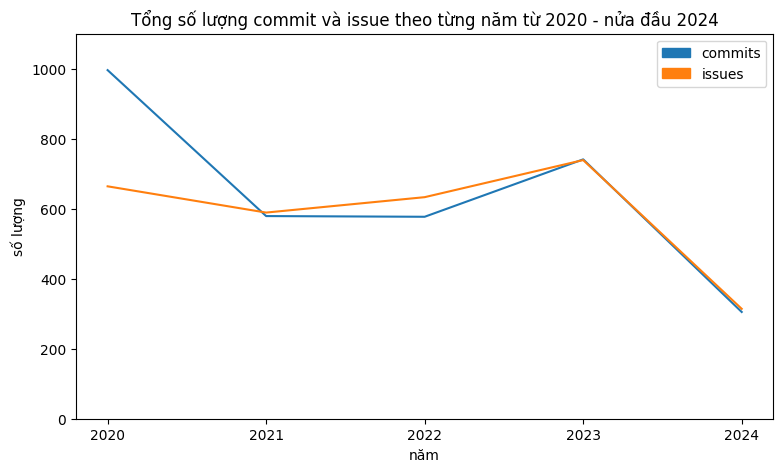

In [95]:
x_year = ['2020','2021','2022','2023','2024']
colors = {'commits':'tab:blue', 'issues':'tab:orange'}   
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.figure(figsize=(9, 5))
plt.plot(x_year,commit_df, color = 'tab:blue')
plt.plot(x_year,issue20_df, color = 'tab:orange')
plt.ylim(0,1100)
plt.legend(handles, labels)
plt.xlabel('năm')
plt.ylabel('số lượng')
plt.title('Tổng số lượng commit và issue theo từng năm từ 2020 - nửa đầu 2024')